In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.optimize import minimize
%matplotlib inline

### Задание 1

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [2]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

<b> a) </b> Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [3]:
def get_ugol(a, b):
    return np.dot(a,b)/( np.linalg.norm(a)*np.linalg.norm(b))

for num, vector in enumerate(raitings):
    dict_vect = {}
    for i in raitings:
        if get_ugol(vector, i) < 0.99:
            dict_vect[get_ugol(vector, i)] = i
    print(f'наиболее близкий вектор к {vector} является {dict_vect[max(dict_vect.keys())]} со значением {max(dict_vect.keys()):.2f}')
    

наиболее близкий вектор к [ 4  4  9  4  1  6 10  7  9  6  9  2  8  6  6] является [ 2  7  7  6 10  6  8  9  8  6 10  1  7 10  4] со значением 0.91
наиболее близкий вектор к [ 9  2  5 10  7  8 10  5  6  2  1  6  8  9  7] является [ 3  7  3  5  7  9  9  6  2  9  1  2  8 10  6] со значением 0.87
наиболее близкий вектор к [ 1  6  8  8  4  9  3  8 10  5  2  6  8  1  6] является [ 5 10  8  8  9  7  2  9  9 10  8  8  8  6 10] со значением 0.92
наиболее близкий вектор к [6 1 9 7 7 9 2 3 5 1 6 6 3 2 7] является [ 5 10  8  8  9  7  2  9  9 10  8  8  8  6 10] со значением 0.86
наиболее близкий вектор к [ 3  7  3  5  7  9  9  6  2  9  1  2  8 10  6] является [ 2  7  7  6 10  6  8  9  8  6 10  1  7 10  4] со значением 0.88
наиболее близкий вектор к [ 8  3  7  3  8  6  1  8  8  6  1  9  4 10  1] является [ 5 10  8  8  9  7  2  9  9 10  8  8  8  6 10] со значением 0.86
наиболее близкий вектор к [ 9  8  4  8  8 10  6  1  1  2  9  5  2  7  2] является [6 1 9 7 7 9 2 3 5 1 6 6 3 2 7] со значением 0.83
н

<b> b) </b>Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [4]:
for numer, elem in enumerate(raitings):
    print(f"median of user {numer} {np.median(sorted(elem))}")
    print(f"mean of user {numer} {elem.mean()}")
    print(f"var of user {numer} {elem.var()}")

median of user 0 6.0
mean of user 0 6.066666666666666
var of user 0 6.72888888888889
median of user 1 7.0
mean of user 1 6.333333333333333
var of user 1 7.822222222222222
median of user 2 6.0
mean of user 2 5.666666666666667
var of user 2 7.955555555555557
median of user 3 6.0
mean of user 3 4.933333333333334
var of user 3 6.995555555555556
median of user 4 6.0
mean of user 4 5.8
var of user 4 8.293333333333333
median of user 5 6.0
mean of user 5 5.533333333333333
var of user 5 9.048888888888888
median of user 6 6.0
mean of user 6 5.466666666666667
var of user 6 9.715555555555557
median of user 7 4.0
mean of user 7 5.066666666666666
var of user 7 6.995555555555556
median of user 8 7.0
mean of user 8 6.733333333333333
var of user 8 6.995555555555556
median of user 9 8.0
mean of user 9 7.8
var of user 9 4.293333333333333


In [18]:
sorted_list = []

for users in raitings:
    list_in_list = []
    sorted_list.append(list_in_list)
    q1 = np.quantile(users, 0.25)
    q3 = np.quantile(users, 0.75)
    for i in users:
        if  i > q1  and i < q3:
            list_in_list.append(i)
        
sorted_list

[[6, 7, 6, 8, 6, 6],
 [7, 8, 6, 6, 8, 7],
 [6, 4, 5, 6, 6],
 [6, 3, 5, 6, 6, 3],
 [7, 5, 7, 6, 8, 6],
 [7, 6, 6, 4],
 [4, 6, 5, 7],
 [4, 6, 4, 4, 4, 7],
 [7, 7, 8, 8, 7],
 [8, 8, 8, 8, 8]]

In [19]:
for i in sorted_list:
    if len(i) > 5:
        i.append(np.mean(i))
        i.remove(min(i))
        i.remove(max(i))
    if len(i) < 5:
        i.append(np.mean(i))

sorted_list

[[7, 6, 6, 6, 6.5],
 [7, 6, 8, 7, 7.0],
 [6, 4, 5, 6, 6],
 [5, 6, 6, 3, 4.833333333333333],
 [7, 7, 6, 6, 6.5],
 [7, 6, 6, 4, 5.75],
 [4, 6, 5, 7, 5.5],
 [6, 4, 4, 4, 4.833333333333333],
 [7, 7, 8, 8, 7],
 [8, 8, 8, 8, 8]]

In [21]:
sorted_array = np.array(sorted_list)
j=0

for numer, elem in enumerate(sorted_array):
    print(f"median of user {numer} {np.median(sorted(elem))} versus {np.median(sorted(raitings[j]))}")
    print(f"mean of user {numer} {elem.mean()} versus {raitings[j].mean()}")
    j+=1

median of user 0 6.0 versus 6.0
mean of user 0 6.3 versus 6.066666666666666
median of user 1 7.0 versus 7.0
mean of user 1 7.0 versus 6.333333333333333
median of user 2 6.0 versus 6.0
mean of user 2 5.4 versus 5.666666666666667
median of user 3 5.0 versus 6.0
mean of user 3 4.966666666666667 versus 4.933333333333334
median of user 4 6.5 versus 6.0
mean of user 4 6.5 versus 5.8
median of user 5 6.0 versus 6.0
mean of user 5 5.75 versus 5.533333333333333
median of user 6 5.5 versus 6.0
mean of user 6 5.5 versus 5.466666666666667
median of user 7 4.0 versus 4.0
mean of user 7 4.566666666666666 versus 5.066666666666666
median of user 8 7.0 versus 7.0
mean of user 8 7.4 versus 6.733333333333333
median of user 9 8.0 versus 8.0
mean of user 9 8.0 versus 7.8


### Задание 2

Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ на python и на бумаге (просто подставить точку в производную и ничего не упрощать).

In [2]:
from sympy import diff, symbols, cos, sin, tan
from scipy.misc import derivative

In [9]:
x = symbols('x')
df = diff(tan(sin(x) + cos(2*x+3))**2)
df

2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))

In [17]:
def f(x):
    return 2*(-2*np.sin(2*x+3)+np.cos(x))*((np.tan(np.sin(x)+np.cos(2*x+3))**2)+1)*np.tan(np.sin(x)+np.cos(2*x+3))

f(1)

55.385917635337854

In [20]:
def f1(x):
    return tan(sin(x) + cos(2*x+3))**2

derivative(f1, 1.0, dx=1e-6)

55.3859176433136

$ tan^2(sin(x)+cos(2⋅x+3)) $
$ 2⋅tan(sin(x)+cos(2⋅x+3))⋅(tan(sin(x)+cos(2⋅x+3))) $
$ 2⋅tan(sin(x)+cos(2⋅x+3))⋅f′(sin(x)+cos(2⋅x+3))*1/cos^2(sin(x)+cos(2⋅x+3)) $
$ 2⋅tan(sin(x)+cos(2⋅x+3))⋅(f′(sin(x))+f′(cos(2⋅x+3)))*1/cos^2(sin(x)+cos(2⋅x+3)) $
$ 2⋅tan(sin(x)+cos(2⋅x+3))⋅(cos(x)−sin(2⋅x+3)⋅f′(2⋅x+3))*1/cos^2(sin(x)+cos(2⋅x+3)) $
$ 2⋅tan(sin(x)+cos(2⋅x+3))⋅(cos(x)−f′(2⋅x)⋅sin(2⋅x+3))*1/cos^2(sin(x)+cos(2⋅x+3)) $
$ 2⋅tan(sin(x)+cos(2⋅x+3))⋅(cos(x)−2⋅f′(x)⋅sin(2⋅x+3))*1/cos^2(sin(x)+cos(2⋅x+3)) $
$ 2⋅tan(sin(x)+cos(2⋅x+3))⋅(cos(x)−2⋅sin(2⋅x+3))*1/cos^2(sin(x)+cos(2⋅x+3)) $

In [25]:
def f2(x):
    return 2*np.tan(np.sin(x)+np.cos(2*x+3))*(np.cos(x)-2*np.sin(2*x+3))*1/np.cos(np.sin(x)+np.cos(2*x+3))**2

f2(1)

55.38591763533786

### Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку <b>error</b>

In [104]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [105]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [106]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

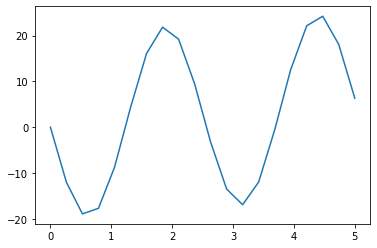

In [107]:
plt.plot(x, fx)
plt.show()

In [128]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

error([0.551651, 7.01515])


246.67827140949595

In [131]:
from scipy.optimize import approx_fprime

u = np.array(200)

minimize(f, x, u, u, method='nelder-mead', options={'xtol': 1e-8, 'disp': True})

# approx_fprime(x, f(1, 1, 1), eps)

TypeError: minimize() got multiple values for argument 'method'

### Задание 4

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Elements')]

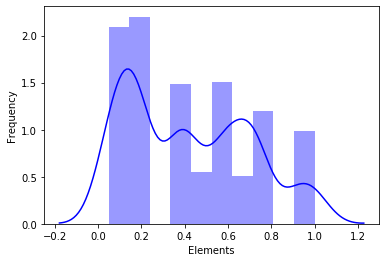

In [37]:
import seaborn

elements = np.random.random(20)
probabilities = [1/20 for x in range(20)]
data = np.random.choice(elements, 1000, p=probabilities)

ax=seaborn.distplot(data,
                kde=True,
                color='Blue')и
ax.set(xlabel='Elements',ylabel='Frequency')

In [38]:
print(data.mean())
print(np.median(data))
print(data.var())

0.4202312023139385
0.38261509258648774
0.0809399373256451


### Задание 5

Найдите собственные значения и собственные вектора матрицы (на python и на бумаге)

[[1, 4],

 [1, 1]]

In [34]:
from sympy import *

matrix = np.array([[1, 4], [1, 1]])

In [35]:
w, v = np.linalg.eig(matrix)

for i in range(len(w)):
    print("Собственное значение " + str(w[i]))
    print("соответствующий ему собственный вектор " + str(v[:,i]))

Собственное значение 3.0000000000000004
соответствующий ему собственный вектор [0.89442719 0.4472136 ]
Собственное значение -0.9999999999999996
соответствующий ему собственный вектор [-0.89442719  0.4472136 ]


(1-l)(1-l)-1 * 4 = 0
1-2l+l^2 - 4 = 0
l^2 - 2l - 4 = 0

D = 4-4*1*-4 = 20

x1 = (2+4.47)/2 = 3 (примерно)
x2 = (2-4.47)/2 = -1 (примерно)

-2x+4y=0
x-2y=0

x=2y
x=2y

y=1
x=2

Собственное значение 3 (2, 1)

2x+4y=0
x+2y=0

x=-2y
x=-2y

y=-1
x=2

Собственное значение -1 (2, -1)

ПС: Собственные вектора не совпадают с python, видимо, из-за округления чисел